<a href="https://colab.research.google.com/github/vakanksha98/FEYNNLAB-Project1/blob/main/market_segmentation_(feynnlab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Load datasets
# -----------------------------
elem_df = pd.read_csv("/content/2015_16_Statewise_Elementary.csv", encoding="latin-1")
sec_df = pd.read_csv("/content/2015_16_Statewise_Secondary.csv", encoding="latin-1")
dist_df = pd.read_csv("/content/2015_16_Districtwise.csv", encoding="latin-1")
elem_df.head(10)
sec_df.head(10)
dist_df.head(10)

,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,...,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,...,21322,26,2594,3489,5315,27,62,23,852,239
1,2015-16,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,...,17307,0,1571,4127,5800,210,53,30,1665,360
2,2015-16,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,...,5444,31,408,817,3284,886,11,0,2873,40
3,2015-16,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,...,12469,18,857,2290,3837,119,45,8,1035,325
4,2015-16,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,...,7408,17,855,1688,2584,151,67,5,1101,209
5,2015-16,1,106,JAMMU & KASHMIR,ANANTNAG,1,12,523,96,1070144.0,...,17771,22,3498,2650,5862,152,60,22,1592,185
6,2015-16,1,107,JAMMU & KASHMIR,LEH (LADAKH),1,6,110,49,147104.0,...,1244,0,889,604,1059,45,9,17,473,0
7,2015-16,1,108,JAMMU & KASHMIR,KARGIL,1,7,134,54,143388.0,...,59,0,59,716,1469,69,26,3,220,99
8,2015-16,1,109,JAMMU & KASHMIR,DODA,1,10,388,80,409576.0,...,14641,2474,2272,2073,2354,165,17,36,766,36
9,2015-16,1,110,JAMMU & KASHMIR,UDHAMPUR,1,11,361,86,555357.0,...,18428,6844,2522,2256,3080,520,13,22,1151,6


In [ ]:
import pandas as pd

# Load datasets
elem = pd.read_csv("/content/2015_16_Statewise_Elementary.csv", encoding="latin-1")
sec = pd.read_csv("/content/2015_16_Statewise_Secondary.csv", encoding="latin-1")
district = pd.read_csv("/content/2015_16_Districtwise.csv", encoding="latin-1")

# Show column names
print("Elementary dataset columns:\n", elem.columns, "\n")
print("Secondary dataset columns:\n", sec.columns, "\n")
print("District dataset columns:\n", district.columns, "\n")


Elementary dataset columns:
 Index(['AC_YEAR', 'STATCD', 'STATNAME', 'DISTRICTS', 'BLOCKS', 'VILLAGES',
       'CLUSTERS', 'TOTPOPULAT', 'P_URB_POP', 'POPULATION_0_6',
       ...
       'USCR35', 'NOTCH_ASS', 'TCHINV', 'TOTCLS1G', 'TOTCLS2G', 'TOTCLS3G',
       'TOTCLS4G', 'TOTCLS5G', 'TOTCLS6G', 'TOTCLS7G'],
      dtype='object', length=816) 

Secondary dataset columns:
 Index(['ac_year', 'statcd', 'statname', 'area_sqkm', 'tot_population',
       'urban_population', 'grwoth_rate', 'sexratio', 'sc_population',
       'st_population',
       ...
       'tchmed_nr', 'tchoth_nr', 'tchse_nr', 'tchnr_nr', 'enrc7_py',
       'enrc8_py', 'enrc9_py', 'enrc10_py', 'enr11_py', 'enr12_py'],
      dtype='object', length=630) 

District dataset columns:
 Index(['AC_YEAR', 'STATCD', 'DISTCD', 'STATNAME', 'DISTNAME', 'DISTRICTS',
       'BLOCKS', 'VILLAGES', 'CLUSTERS', 'TOTPOPULAT',
       ...
       'UUNI_ALL', 'UUNI_SC', 'UUNI_ST', 'TOTCLS1G', 'TOTCLS2G', 'TOTCLS3G',
       'TOTCLS4G', 'TOTCLS5G'

In [ ]:
# Find columns related to literacy, PTR, enrollment
print([col for col in elem.columns if "LIT" in col.upper()])
print([col for col in elem.columns if "PTR" in col.upper()])
print([col for col in elem.columns if "GER" in col.upper() or "ENR" in col.upper()])

print([col for col in sec.columns if "LIT" in col.upper()])
print([col for col in sec.columns if "PTR" in col.upper()])
print([col for col in sec.columns if "GER" in col.upper() or "ENR" in col.upper()])


['FEMALE_LIT', 'MALE_LIT']
['PPTR30', 'UPTR35']
['ENR1', 'ENR2', 'ENR3', 'ENR4', 'ENR5', 'ENR6', 'ENR7', 'ENR9', 'ENRTOT', 'ENR1G', 'ENR2G', 'ENR3G', 'ENR4G', 'ENR5G', 'ENR6G', 'ENR7G', 'ENR9G', 'ENRTOTG', 'ENR1P', 'ENR2P', 'ENR3P', 'ENR4P', 'ENR5P', 'ENR6P', 'ENR7P', 'ENR9P', 'ENRTOTP', 'ENR1M', 'ENR2M', 'ENR3M', 'ENR4M', 'ENR5M', 'ENR6M', 'ENR7M', 'ENR9M', 'ENRTOTM', 'ENR1GR', 'ENR2GR', 'ENR3GR', 'ENR4GR', 'ENR5GR', 'ENR6GR', 'ENR7GR', 'ENR9GR', 'ENRTOTGR', 'ENR1PR', 'ENR2PR', 'ENR3PR', 'ENR4PR', 'ENR5PR', 'ENR6PR', 'ENR7PR', 'ENR9PR', 'ENRTOTPR', 'ENR501', 'ENR502', 'ENR503', 'ENR504', 'ENR505', 'ENR506', 'ENR507', 'ENR50TOT', 'ENRG1', 'ENRG2', 'ENRG3', 'ENRG4', 'ENRG5', 'ENRG6', 'ENRG7', 'ENRGTOT', 'ENRE11', 'ENRE12', 'ENRE13', 'ENRE14', 'ENRE15', 'ENRE16', 'ENRE17', 'ENRE21', 'ENRE22', 'ENRE23', 'ENRE24', 'ENRE25', 'ENRE26', 'ENRE27', 'ENRE31', 'ENRE32', 'ENRE33', 'ENRE34', 'ENRE35', 'ENRE36', 'ENRE37', 'ENRE41', 'ENRE42', 'ENRE43', 'ENRE44', 'ENRE45', 'ENRE46', 'ENRE47', 'ENRE51'

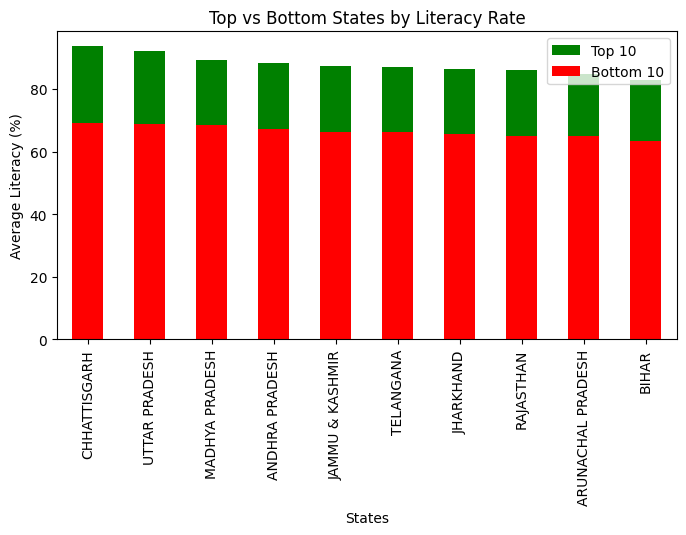

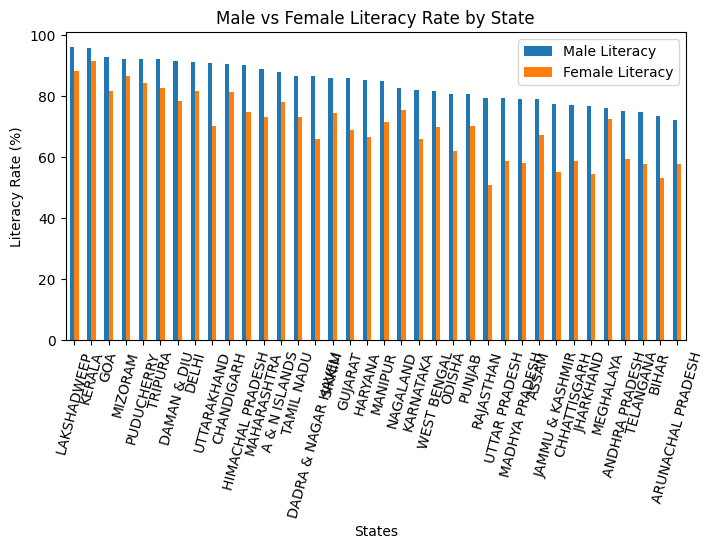

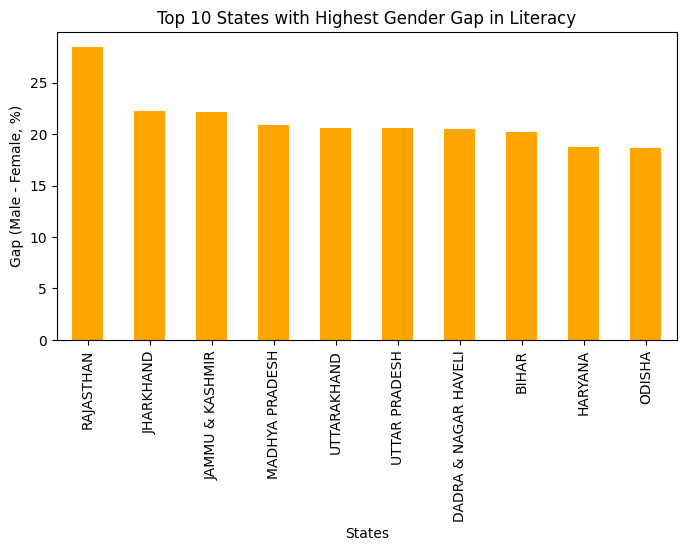

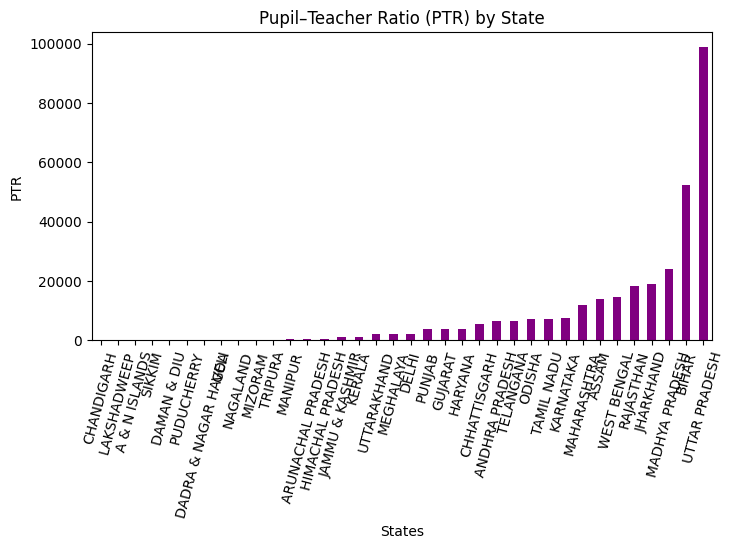

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# Load Data
# ===============================
district_df = pd.read_csv("/content/2015_16_Districtwise.csv")
elem_df = pd.read_csv("/content/2015_16_Statewise_Elementary.csv")
sec_df = pd.read_csv("/content/2015_16_Statewise_Secondary.csv")

# ===============================
# Literacy Analysis (Districtwise Dataset)
# ===============================

# Create overall literacy column
district_df["LIT_TOTAL"] = (district_df["MALE_LIT"] + district_df["FEMALE_LIT"]) / 2

# Average literacy per state
lit_state = district_df.groupby("STATNAME")["LIT_TOTAL"].mean().sort_values(ascending=False)

# --- Chart 1: Top vs Bottom Literacy States
plt.figure(figsize=(8,4))
lit_state.head(10).plot(kind="bar", color="green", label="Top 10")
lit_state.tail(10).plot(kind="bar", color="red", label="Bottom 10")
plt.title("Top vs Bottom States by Literacy Rate")
plt.ylabel("Average Literacy (%)")
plt.xlabel("States")
plt.legend()
plt.show()

# --- Chart 2: Male vs Female Literacy by State
lit_gender = district_df.groupby("STATNAME")[["MALE_LIT", "FEMALE_LIT"]].mean().sort_values("MALE_LIT", ascending=False)
lit_gender.plot(kind="bar", figsize=(8,4))
plt.title("Male vs Female Literacy Rate by State")
plt.ylabel("Literacy Rate (%)")
plt.xlabel("States")
plt.xticks(rotation=75)
plt.legend(["Male Literacy", "Female Literacy"])
plt.show()

# --- Chart 3: Gender Gap in Literacy (Male - Female)
lit_gender["Gap"] = lit_gender["MALE_LIT"] - lit_gender["FEMALE_LIT"]
lit_gap = lit_gender["Gap"].sort_values(ascending=False)

plt.figure(figsize=(8,4))
lit_gap.head(10).plot(kind="bar", color="orange")
plt.title("Top 10 States with Highest Gender Gap in Literacy")
plt.ylabel("Gap (Male - Female, %)")
plt.xlabel("States")
plt.show()

# ===============================
# PTR Analysis (Elementary Dataset)
# ===============================
if "PPTR30" in elem_df.columns:  # Example: PTR column name check
    ptr_state = elem_df.groupby("STATNAME")["PPTR30"].mean().sort_values()
    plt.figure(figsize=(8,4))
    ptr_state.plot(kind="bar", color="purple")
    plt.title("Pupil–Teacher Ratio (PTR) by State")
    plt.ylabel("PTR")
    plt.xlabel("States")
    plt.xticks(rotation=75)
    plt.show()

# ===============================
# Gender Parity Index (Elementary vs Secondary)
# ===============================
if "GPI" in elem_df.columns and "gpi" in sec_df.columns:
    gpi_elem = elem_df.groupby("STATNAME")["GPI"].mean()
    gpi_sec = sec_df.groupby("statname")["gpi"].mean()

    gpi_compare = pd.concat([gpi_elem, gpi_sec], axis=1)
    gpi_compare.columns = ["Elementary GPI", "Secondary GPI"]

    gpi_compare.plot(kind="bar", figsize=(8,4))
    plt.title("Gender Parity Index: Elementary vs Secondary")
    plt.ylabel("GPI (Girls per 100 Boys)")
    plt.xlabel("States")
    plt.xticks(rotation=75)
    plt.show()
